<a href="https://colab.research.google.com/github/couragedike1/Neuro-Network-Models/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab: Building a Convolutional Neural Network (CNN) from Scratch using CIFAR-10 Dataset**

### **Objective:**
In this lab, you will:
- Load and preprocess the CIFAR-10 dataset.
- Build a Convolutional Neural Network (CNN) model from scratch using TensorFlow and Keras.
- Train the CNN model and evaluate its performance on the CIFAR-10 dataset.

### **Dataset Overview:**
The **CIFAR-10 dataset** is a collection of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images. The 10 classes represent the following categories:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

Each image in the dataset is a 32x32 pixel RGB image, which means each image has 3 color channels (Red, Green, Blue), with a width and height of 32 pixels.

### **Convolutional Neural Networks (CNNs):**
CNNs are deep learning models specifically designed to process data with a grid-like topology, such as images. CNNs are particularly effective in tasks such as image classification, object detection, and image segmentation because they can automatically learn spatial hierarchies of features from input images.

In this lab, we will design a simple CNN with the following structure:
- **Convolutional Layers** to extract image features.
- **Pooling Layers** to reduce the spatial dimensions.
- **Fully Connected Layers** for final classification.


### **Next Steps (Optional):**
After completing this lab, you can further improve the model by experimenting with:
- **Data Augmentation**: Use techniques like rotation, flipping, and zooming to increase the diversity of the training data.
- **Hyperparameter Tuning**: Adjust learning rates, batch size, and the number of epochs to improve accuracy.
- **Advanced Architectures**: Explore more complex CNN architectures like VGG, ResNet, or DenseNet for higher performance.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the shapes of the dataset
print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


### **Visualizing the CIFAR-10 Dataset**

In the following code block, we display the first 5 images from the training dataset along with their respective labels. The images are shown in a 32x32 pixel format, as this is the standard size in the CIFAR-10 dataset.

#### **Experiment:**
If you'd like to see more or fewer images, you can easily modify the value inside the `range()` function. For example:
- **To show 10 images**, change `range(5)` to `range(10)`.
- **To see specific images**, modify the index `train_images[i]` and `train_labels[i][0]` to any desired index within the range of the dataset (0 to 49999 for the training set).

Feel free to experiment with these values to explore more images in the dataset!


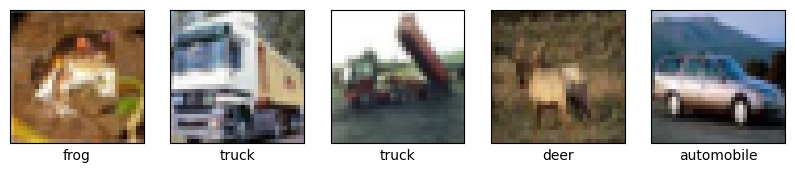

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot first 5 images from the training dataset
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])  # Remove x-ticks
    plt.yticks([])  # Remove y-ticks
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


### **Building the Convolutional Neural Network (CNN)**

In this section, we will build a simple Convolutional Neural Network (CNN) for classifying images from the CIFAR-10 dataset. The architecture consists of three main parts: **convolutional blocks**, **flattening**, and **dense layers**.

1. **Sequential Model:**
   - We are using the Keras `Sequential` model, which allows us to stack layers one after the other. This is perfect for building models where each layer has a single input and a single output.

2. **First Convolutional Block:**
   - `Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))`: This is the first convolutional layer with 32 filters, each of size 3x3. It applies a ReLU activation function to introduce non-linearity. The `input_shape` is specified as (32, 32, 3), which corresponds to the size and the RGB channels of the images.
   - `MaxPooling2D((2, 2))`: After the convolution, we apply a max pooling layer with a 2x2 window to reduce the spatial dimensions, effectively downsampling the feature maps.

3. **Second Convolutional Block:**
   - `Conv2D(64, (3, 3), activation='relu')`: The second convolutional layer increases the number of filters to 64, still using a 3x3 kernel size.
   - `MaxPooling2D((2, 2))`: Another max pooling layer is used to further reduce the spatial dimensions.

4. **Third Convolutional Block:**
   - `Conv2D(64, (3, 3), activation='relu')`: The third convolutional layer maintains 64 filters and continues extracting higher-level features from the images. No pooling is applied after this layer.

5. **Flatten and Dense Layers:**
   - `Flatten()`: After the convolutional layers, we flatten the 3D feature maps into a 1D vector so that it can be fed into the dense (fully connected) layers.
   - `Dense(64, activation='relu')`: A fully connected layer with 64 neurons and ReLU activation is added to learn from the flattened features.
   - `Dense(10, activation='softmax')`: The final output layer has 10 neurons (one for each class) and uses the softmax activation function to output probabilities for each class. The softmax ensures that the sum of the probabilities across all classes is equal to 1.



In [ ]:
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten and add Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output units for the 10 classes


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.4360 - loss: 1.5432 - val_accuracy: 0.5084 - val_loss: 1.3453
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.5489 - loss: 1.2629 - val_accuracy: 0.5824 - val_loss: 1.1923
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.6056 - loss: 1.1132 - val_accuracy: 0.6158 - val_loss: 1.0915
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.6421 - loss: 1.0240 - val_accuracy: 0.6349 - val_loss: 1.0402
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.6610 - loss: 0.9601 - val_accuracy: 0.6544 - val_loss: 1.0026
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.6845 - loss: 0.9038 - val_accuracy: 0.6760 - val_loss: 0.9442
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.6970 - loss: 0.8623 - val_accuracy: 0.6735 - val_loss: 0.9392
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.7134 - loss: 0.8204 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 5s - 16ms/step - accuracy: 0.6628 - loss: 0.9875

Test accuracy: 0.6628000140190125


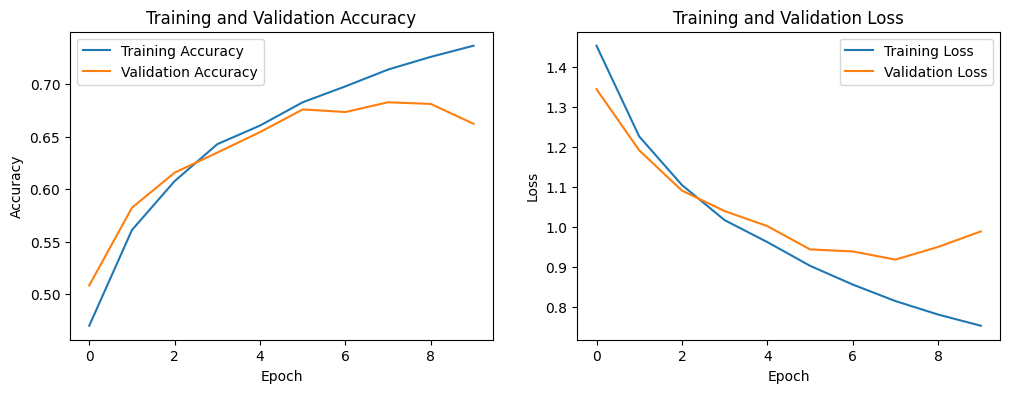

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Explanation:

Accuracy plot: Shows how training and validation accuracy improve over epochs. A gap between them indicates overfitting.
Loss plot: Shows how training and validation loss decrease. Rising validation loss suggests overfitting.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


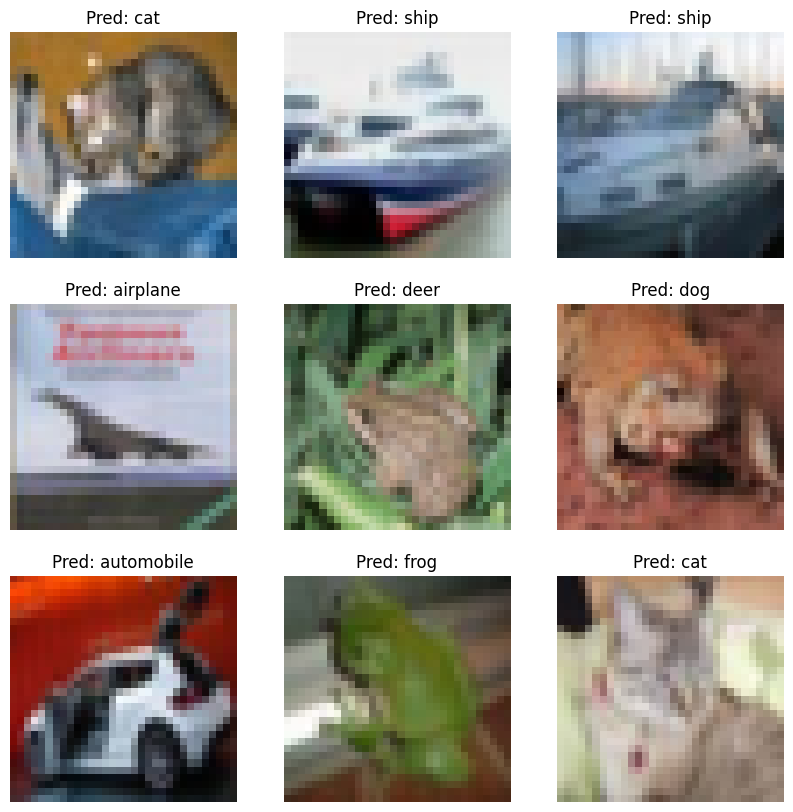

In [ ]:
# Predict on a few test images
predictions = model.predict(test_images[:9])

# Visualize predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Pred: {class_names[predicted_label]}")
    plt.axis('off')
plt.show()

#Explanation:

model.predict outputs probabilities for each class; np.argmax selects the class with the highest probability.
The plot shows 9 test images with predicted image.